In [30]:
using DFTK
using Plots

# Day 3 - Morning

What we have to feed into our DFT code!

- lattice
- positions
- atoms and how we want to treat their electrons

All of the remaining will be specific to DFTK.jl!

## Lattice

Let's start by defining the lattce on which the atoms live.

In [12]:
# DFTK.jl receives the lattice as a 3 x 3 matrix
matrix = rand(3, 3)

3×3 Array{Float64,2}:
 0.484688  0.216217  0.0521254
 0.545211  0.459604  0.83961
 0.103306  0.283048  0.529888

In [13]:
matrix;

In [14]:
lattice = [[1 0 0]; [0 1 0]; [0 0 1]]

3×3 Array{Int64,2}:
 1  0  0
 0  1  0
 0  0  1

In [ ]:
lattice[,:] # columns
lattice[:, 2] # rows

## Positions

Where do the atoms sit in the crystal structure!

$$ \text{positions} = r_{1} \begin{pmatrix} 1\\ 0\\ 0\\ \end{pmatrix} + r_{2} \begin{pmatrix} 0\\ 1\\ 0\\ \end{pmatrix} + r_{3} \begin{pmatrix} 0\\ 0\\ 1\\ \end{pmatrix}$$

In [21]:
positions = [[0, 0, 0], [0.5, 0.5, 0.0]];

In [27]:
positions;

## Atoms

Specify the atomic species and how many electrons you want to use

In [28]:
H = ElementPsp(:H, psp=load_psp(:H, functional="lda"))

ElementPsp(1, :H, PspHgh(1, 0.2, [-4.1802368, 0.72507482, 0.0, 0.0], -1, Float64[], Array{Float64,2}[], "hgh/lda/h-q1.hgh", "H GTH-PADE-q1 GTH-LDA-q1"))

In [32]:
He = ElementPsp(:He, psp=load_psp(:He, functional="lda"));
O  = ElementPsp(:O, psp=load_psp(:O, functional="lda"));
Cu = ElementPsp(:Cu, psp=load_psp(:Cu, functional="lda"));

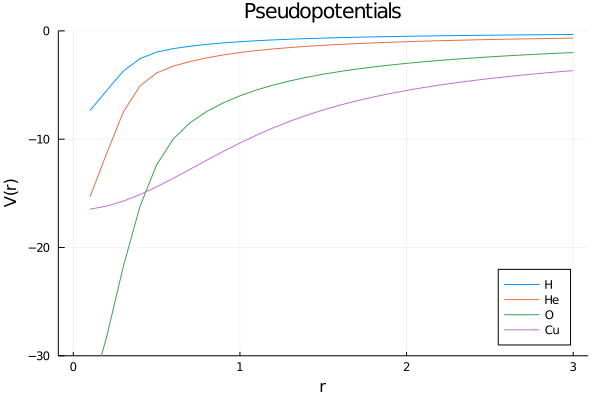

In [40]:
r = collect(0:0.1:3)
p = plot(ylims=(-30, 0), legend=:bottomright, xlabel="r", ylabel="V(r)", title="Pseudopotentials")
plot!(p, r, DFTK.local_potential_real.(Ref(H), r), label="H")
plot!(p, r, DFTK.local_potential_real.(Ref(He), r), label="He")
plot!(p, r, DFTK.local_potential_real.(Ref(O), r), label="O")
plot!(p, r, DFTK.local_potential_real.(Ref(Cu), r), label="Cu")

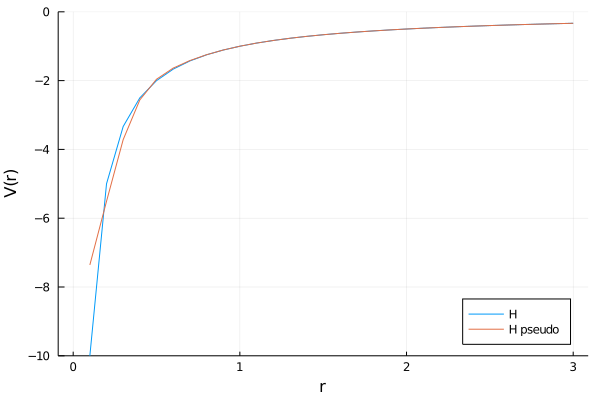

In [41]:
r = collect(0:0.1:3)
p = plot(ylims=(-10, 0), legend=:bottomright, xlabel="r", ylabel="V(r)")
plot!(p, r, -1 ./ abs.(r), label="H")
plot!(p, r, DFTK.local_potential_real.(Ref(H), r), label="H pseudo")

## Build the atoms

Put everything together...

DFTK uses dictionaries...
```julia
    
    atoms = [species => position]

```